In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.measure import compare_psnr
import math

### 1. Sharpen the rice image using box and gaussian:

In [2]:
file_path = "./"
plt.rcParams['figure.figsize'] = [20, 20]
plt.rcParams['font.size'] = 20

In [3]:
rice_image_path = file_path + "rice.png"
rice_img_org = cv2.imread(rice_image_path, cv2.IMREAD_COLOR)

In [4]:
rice_gaussian_blur = cv2.GaussianBlur(rice_img_org, (5,5), math.sqrt(2))
kernel = np.ones((5,5), np.float32)/25
rice_box_blur = cv2.filter2D(rice_img_org, -1, kernel)

In [5]:
details_gaussian = cv2.subtract(rice_img_org, rice_gaussian_blur)
sharp_rice_gauss = cv2.add(rice_img_org, details_gaussian)

details_box = cv2.subtract(rice_img_org, rice_box_blur)
sharp_rice_box = cv2.add(rice_img_org, details_box)

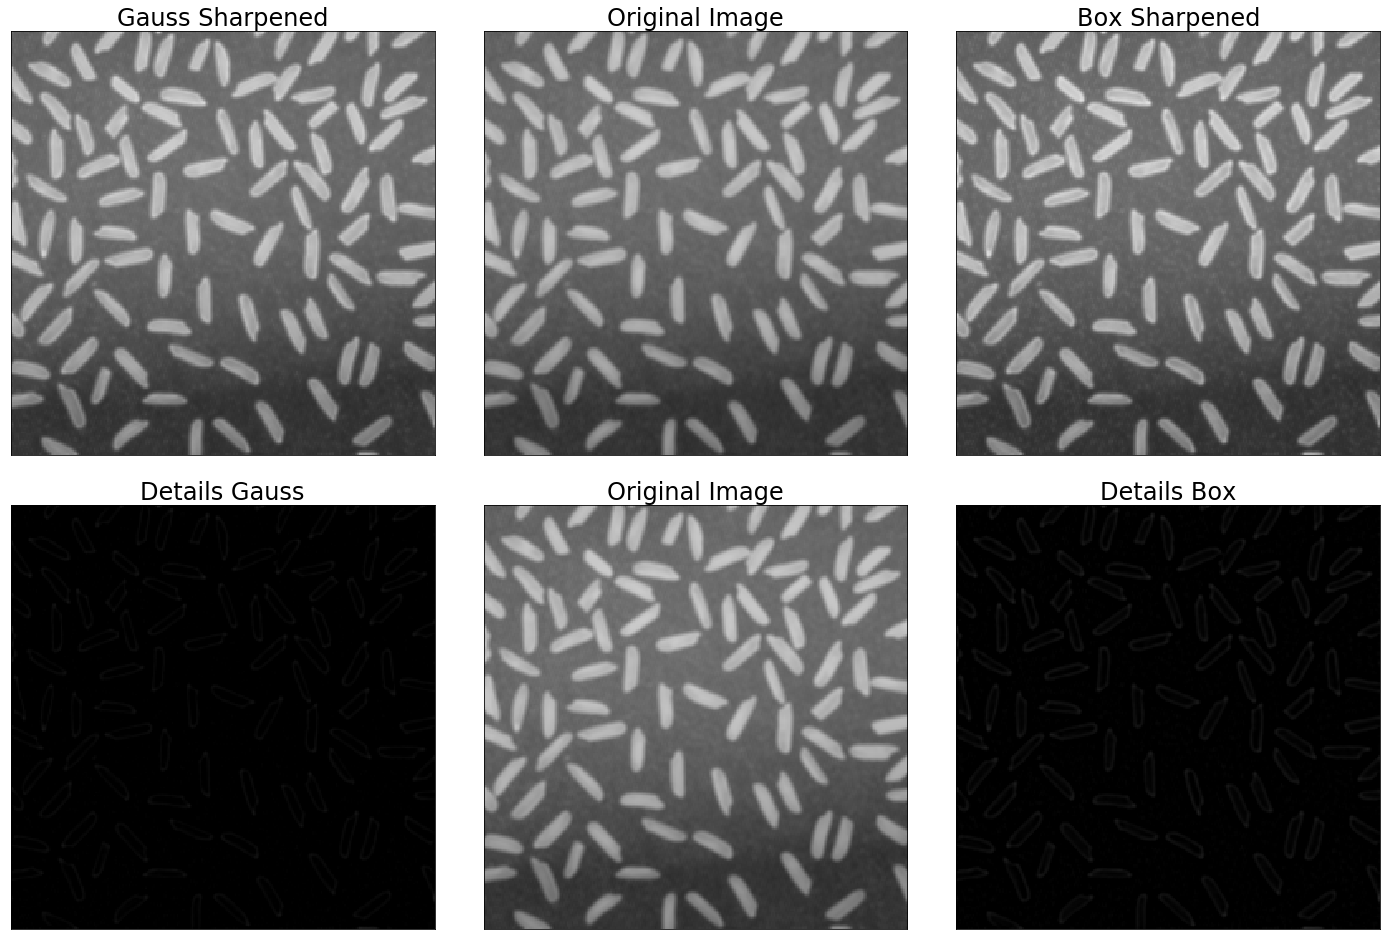

In [6]:
# convert from BGR to RGB
sharp_gauss = cv2.cvtColor(sharp_rice_gauss, cv2.COLOR_BGR2RGB)
sharp_box = cv2.cvtColor(sharp_rice_box, cv2.COLOR_BGR2RGB)
org_rice = cv2.cvtColor(rice_img_org, cv2.COLOR_BGR2RGB)

plt.subplot(331), plt.imshow(sharp_rice_gauss)
plt.title("Gauss Sharpened"), plt.xticks([]), plt.yticks([])
plt.subplot(332), plt.imshow(org_rice)
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(333), plt.imshow(sharp_rice_box)
plt.title("Box Sharpened"), plt.xticks([]), plt.yticks([])
plt.subplot(334), plt.imshow(cv2.cvtColor(details_gaussian, cv2.COLOR_BGR2RGB))
plt.title("Details Gauss"), plt.xticks([]), plt.yticks([])
plt.subplot(335), plt.imshow(org_rice)
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(336), plt.imshow(cv2.cvtColor(details_box, cv2.COLOR_BGR2RGB))
plt.title("Details Box"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

### 2. Which gave the better result and was it expected?

The box filter seemed to give the better result. This is to be expected. The gaussian filter takes the weighted average of the pixel's neighborhood with the weights more toward the central pixels. 

The box filter however, takes a uniformly weighted average of all the pixels. 

This means that using a gaussian filter, you achieve a much smoother image, with edges being perserved much better. However, when we calculate the details of the image, we subtract the original image by the blurred image. In the gaussian case, we get a lack of edges in our detail because they have been perserved so well from the original image to the blurred image. In the box filter however, we would would receive a defined outline of our edges. 

Knowing this and looking at the details produced for both gaussian and box filters, we see that the box filter is more effect for sharpening images.